In [1]:
import nltk
import string
import pyttsx3
import speech_recognition as sr
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Diabetes_and_Digestive_and_Kidney_DiseasesQA.csv')
data

,Question,Answer,topic,split
0,What is (are) Kidney Stones in Adults ?,A kidney stone is a solid piece of material th...,Diabetes_Digestive_Kidney,train
1,What is (are) Kidney Stones in Adults ?,The urinary tract is the bodys drainage system...,Diabetes_Digestive_Kidney,train
2,Who is at risk for Kidney Stones in Adults? ?,"Anyone can get a kidney stone, but some people...",Diabetes_Digestive_Kidney,train
3,What causes Kidney Stones in Adults ?,Kidney stones can form when substances in the ...,Diabetes_Digestive_Kidney,train
4,What is (are) Kidney Stones in Adults ?,Four major types of kidney stones can form:\n ...,Diabetes_Digestive_Kidney,train
...,...,...,...,...
1187,What are the treatments for What I need to kno...,"Once you have cirrhosis, nothing can make all ...",Diabetes_Digestive_Kidney,train
1188,What are the treatments for What I need to kno...,"If too much scar tissue forms, your liver coul...",Diabetes_Digestive_Kidney,train
1189,How to prevent What I need to know about Cirrh...,"To prevent cirrhosis,\n \n- see...",Diabetes_Digestive_Kidney,train
1190,What to do for What I need to know about Cirrh...,- Cirrhosis is scarring of the liver. Scar tis...,Diabetes_Digestive_Kidney,train


In [3]:
vectorizer = TfidfVectorizer()

In [4]:
x = vectorizer.fit_transform(data['Question']).toarray()
y = data['Answer']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42 )

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
y_pred = model.predict(x_test)
y_pred

array(['Blood tests are used to diagnosis diabetes and prediabetes because early in the disease type 2 diabetes may have no symptoms. All diabetes blood tests involve drawing blood at a health care providers office or commercial facility and sending the sample to a lab for analysis. Lab analysis of blood is needed to ensure test results are accurate. Glucose measuring devices used in a health care providers office, such as finger-stick devices, are not accurate enough for diagnosis but may be used as a quick indicator of high blood glucose.\n                \nTesting enables health care providers to find and treat diabetes before complications occur and to find and treat prediabetes, which can delay or prevent type 2 diabetes from developing.\n                \nAny one of the following tests can be used for diagnosis:*\n                \n- an A1C test, also called the hemoglobin A1c, HbA1c, or glycohemoglobin test  - a fasting plasma glucose (FPG) test  - an oral glucose tolerance test

In [8]:
mse = accuracy_score(y_test, y_pred)
y_test

920    A major research study, the Diabetes Preventio...
247    - A kidney stone is a solid piece of material ...
260    Treatments for perineal injury vary with the s...
155    Although NASH has become more common, its unde...
566    A specific test to diagnose cyclic vomiting sy...
                             ...                        
367    To help reduce symptoms, a health care provide...
354    Diarrhea is loose, watery stools. Chronic, or ...
139    - Porphyrias are rare disorders that affect ma...
405    The nerve damage of diabetes may cause sexual ...
822    Diabetic neuropathy can be classified as perip...
Name: Answer, Length: 239, dtype: object

In [9]:
mse

0.029288702928870293

In [10]:
y_pred_transform = vectorizer.transform(y_pred).toarray()
y_test_transform = vectorizer.transform(y_test).toarray()
mser = mean_squared_error(y_test_transform, y_pred_transform)
mser

0.0030574661847101747

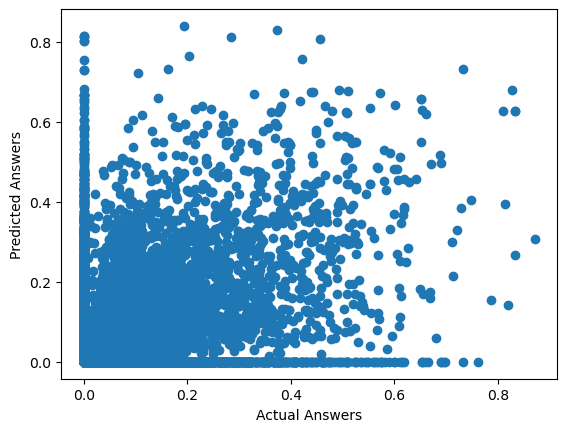

In [11]:
plt.scatter(y_test_transform, y_pred_transform)
plt.xlabel('Actual Answers')
plt.ylabel('Predicted Answers')
plt.show()

In [12]:
engine = pyttsx3.init()
rate = engine.getProperty('rate')
engine.setProperty('rate', 150)
volume = engine.getProperty('volume')
engine.setProperty('volume', 1.0)
voice = engine.getProperty('voices')
engine.setProperty('voice', voice[1].id)

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def summarize_text(text, summary_length=3):
    # Tokenize the paragraph into sentences
    sentences = sent_tokenize(text)
    
    # Tokenize sentences into words
    words = word_tokenize(text.lower())
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    
    # Calculate the frequency of each word
    word_freq = nltk.FreqDist(words)
    
    # Score each sentence based on word frequencies
    sentence_scores = {}
    for sentence in sentences:
        for word in word_tokenize(sentence.lower()):
            if word in word_freq:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = word_freq[word]
                else:
                    sentence_scores[sentence] += word_freq[word]
    
    # Sort sentences by score
    ranked_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
    
    # Select top sentences as summary
    summary_sentences = ranked_sentences[:summary_length]
    summary = ' '.join(summary_sentences)
    
    return summary


In [15]:
def get_answer(question):
    data = []
    data.append(question)
    data = vectorizer.transform(data)
    pred = model.predict(data)
    pred = str(pred)
    pred = pred.replace('\n',' ')
    summary = summarize_text(pred)
    return pred

In [ ]:
# Simple chatbot loop
engine.say("Hello! I'm a health complaint chatbot. How can I help you today?")
engine.runAndWait()

while True:
    question = input("\nYou: ")
    if question.lower() in ['exit', 'quit', 'bye']:
        engine.say(" Goodbye! Take care! and stay safe")
        engine.runAndWait()
        break
    elif question.lower() in ['thanks', 'thank', 'appreciate']:
        engine.say("I am glad you acknowledge my answer to your question. I am and will be available to answer all of your questions.😊")
    answer = get_answer(question)
    print(answer)
    engine.say(answer)
    engine.say('I hope that was helpful')
    # engine.runAndWait()



You:  what is diabetes


['Diabetes is a complex group of diseases with a variety of causes. People with diabetes have high blood glucose, also called high blood sugar or hyperglycemia.\n                \nDiabetes is a disorder of metabolismthe way the body uses digested food for energy. The digestive tract breaks down carbohydratessugars and starches found in many foodsinto glucose, a form of sugar that enters the bloodstream. With the help of the hormone insulin, cells throughout the body absorb glucose and use it for energy. Diabetes develops when the body doesnt make enough insulin or is not able to use insulin effectively, or both.\n                \nInsulin is made in the pancreas, an organ located behind the stomach. The pancreas contains clusters of cells called islets. Beta cells within the islets make insulin and release it into the blood.\n                \nIf beta cells dont produce enough insulin, or the body doesnt respond to the insulin that is present, glucose builds up in the blood instead of 